A feature of MotionClouds is the ability to precisely tune the precision of information  following the principal axes. One which is particularly relevant for the primary visual cortical area of primates (area V1) is to tune the otirentation mean and bandwidth.

This is part of a larger study to tune [orientation bandwidth](https://laurentperrinet.github.io/sciblog/posts/2014-11-10_orientation.html).

## summary of the electro-physiology protocol

<!-- TEASER_END -->



In [1]:
import os
import numpy as np
import MotionClouds as mc
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, mc.N_frame/downscale)

name = 'balaV1'
mc.figpath = os.path.join('../files', '2014-11-10_balaV1-protocol')
if not(os.path.isdir(mc.figpath)): os.mkdir(mc.figpath)

In [2]:
N_X = fx.shape[0]
width = 29.7*256/1050
sf_0 = 4.*width/N_X
B_V = 2.5     # BW temporal frequency (speed plane thickness)
B_sf = sf_0   # BW spatial frequency
theta = 0.0   # Central orientation
B_theta_low, B_theta_high = np.pi/32, 2*np.pi 
B_V = 0.5
seed=12234565

mc1 = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta_low)
mc2 = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, theta=theta, B_theta=B_theta_high)
name_ = name + '_1'
mc.figures(mc1, name_, seed=seed, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)
name_ = name + '_2'
mc.figures(mc2, name_, seed=seed, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)

/usr/local/lib/python3.7/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


This figure shows how one can create different MotionCloud stimuli that specifically target different population in V1. We show in the two lines of this table  motion cloud component with a (Top) narrow orientation bandwith  (Bottom) a wide bandwitdh: perceptually, there is no predominant position or speed, just different orientation contents.
<br>Columns represent isometric projections of a cube. The left column displays iso-surfaces of the spectral envelope by displaying enclosing volumes at 5 different energy values with respect to the peak amplitude of the Fourier spectrum.
<br>The middle column shows an isometric view of the  faces of the movie cube. The first frame of the movie lies on the x-y plane, the x-t plane lies on the top face and motion direction is seen as diagonal lines on this face (vertical motion is similarly see in the y-t face). The third column displays the actual movie as an animation.

Note: an analysis of the response of a neural network to such stimulations as been explored by [Chloé Pasturel](https://laurentperrinet.github.io/sciblog/posts/2014-06-18-stage-m1-chloe-pasturel-week-6.html).

In [3]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

## designing a protocol

In light with the classical result that OS in V1 should be invariant to contrast (of course in a limited range) and that contrast is a variable manipulating the relative amount of extrinsic noise (that is, originating from the source, external to the system), it is is crucial to titrate the effect of the level of intrinsic noise by changing the precision of the variable that is coded in V1.

 * is precision (here, of orientation) coded in the neural activity?
 * does a balanced network account for that effect?

Designing an experiment is mainly constrained by the time available for recording and we will estimate it here (optimistically) to 3 hours. The protocal consists in showing a set of motion clouds with diferent parameters. Spatial frequency will be tuned from the litterature for the given eccentricity in V1, while average speed (as in the above example) is always nil. The remaining parameters are the precision in spatial frequency ($B_f$), the precision in time ($B_V$) which is inversely proportional to the average life-time of the textons, orientation $\theta$ and precision for orientation ($B_\theta$). To allow a comparison with the classical grating, we will start from infinitely fine envelopes (Dirac) with $B_\theta=0$,  $B_V=0$ and $B_f=0$ and then grow from this reference point. 

See also the test page for the [orientation component](https://neuralensemble.github.io/MotionClouds/posts/testing-grating.html)

The main goal is to study OS as a function of orientation bandwidth, so we will test 16 orientations (including the cardinals). Then, we choose 5 levels of precision for orientation ($B_\theta$). The following plot shows how we cover the orientation space with 16 orientations and an increasing bandwidth:

In [4]:
def envelope(th, theta, B_theta):
    if B_theta==np.inf:
        env = np.ones_like(th) 
    elif B_theta==0:
        env = np.zeros_like(th)
        env[np.argmin(th < theta)] = 1.
    else:
        env = np.exp((np.cos(2*(th-theta))-1)/4/B_theta**2)
    return env/env.sum()        

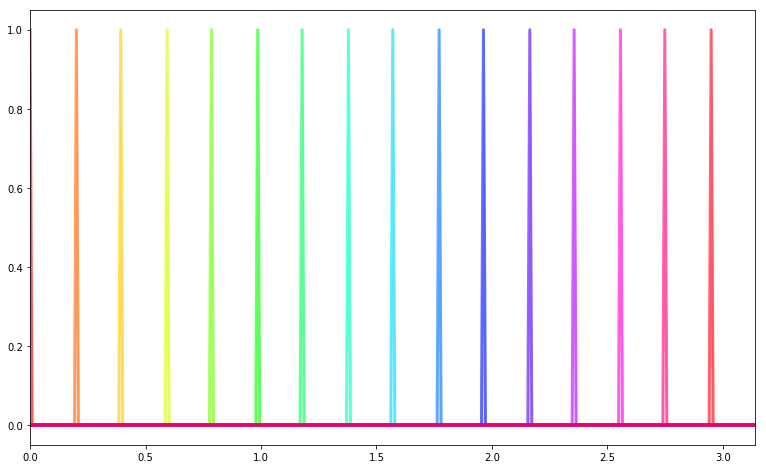

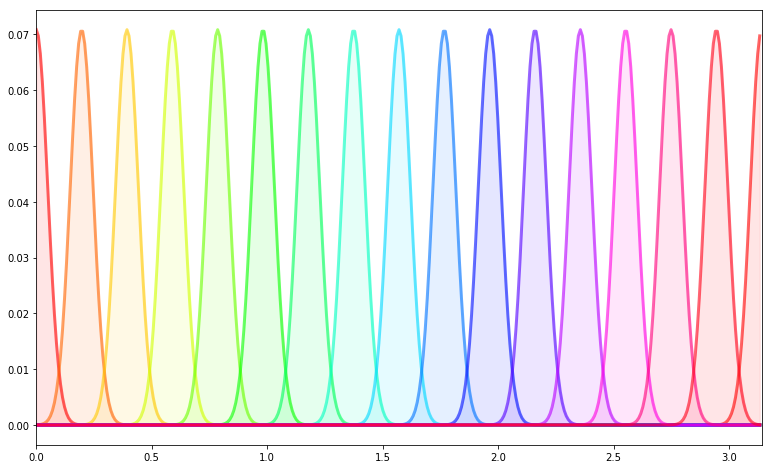

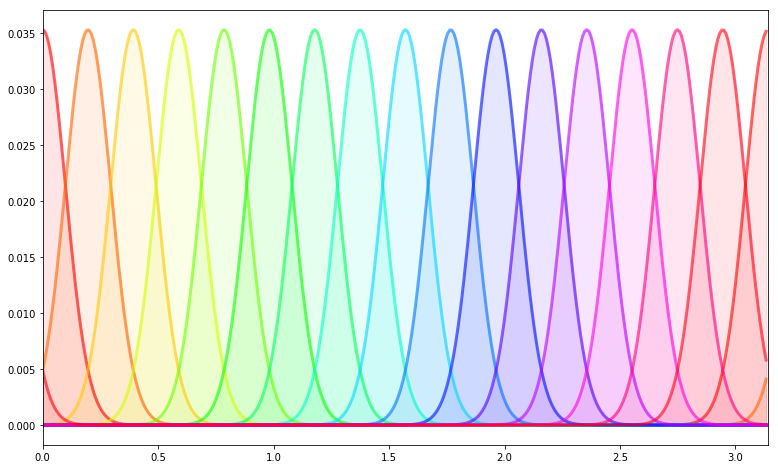

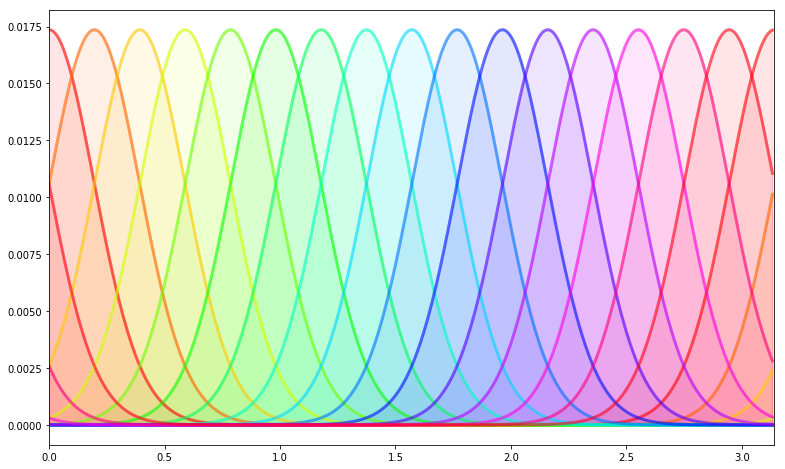

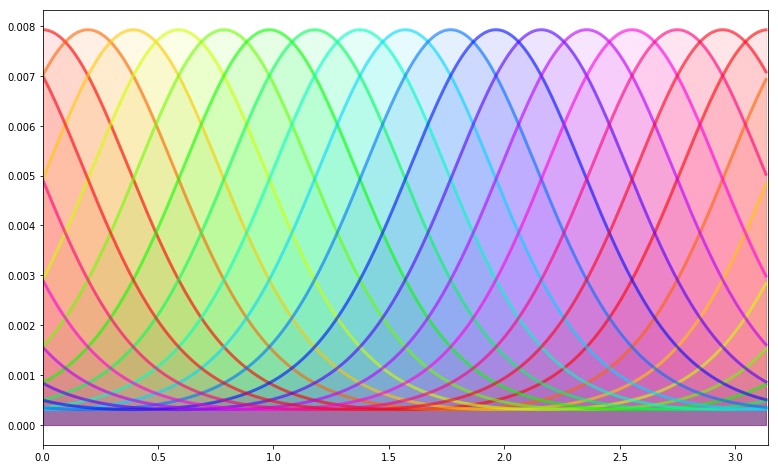

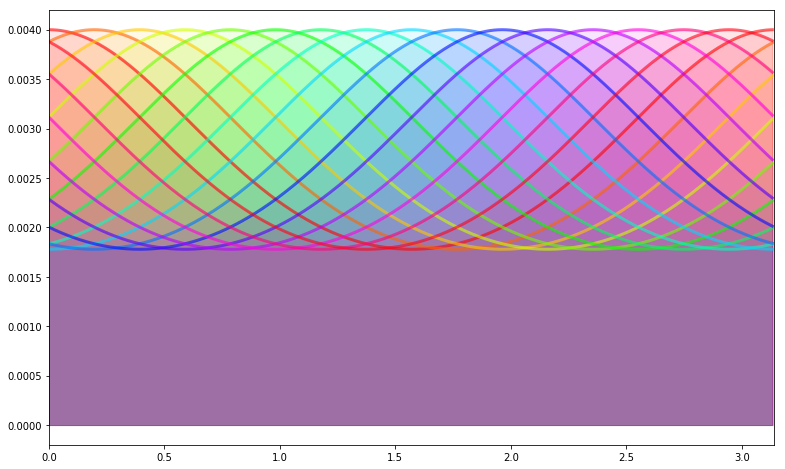

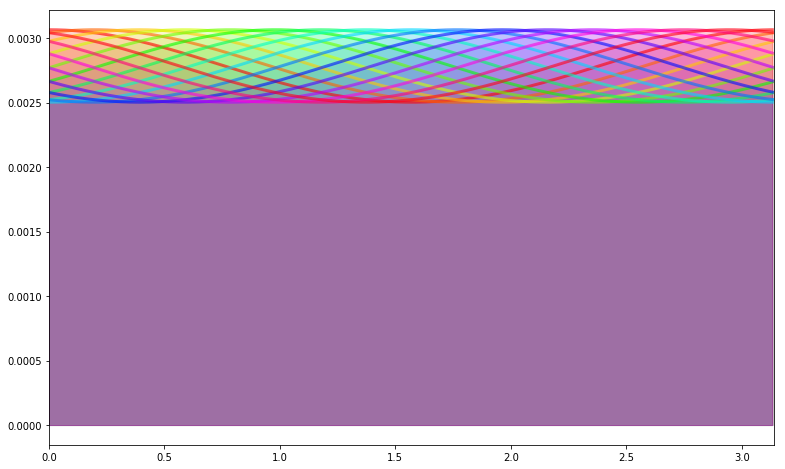

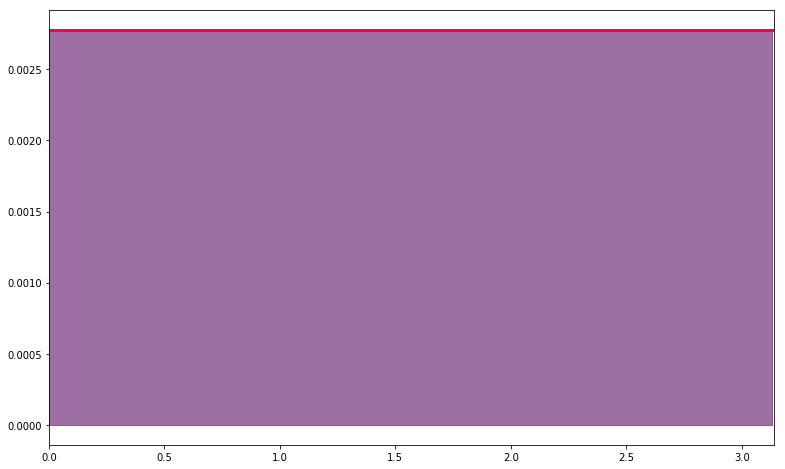

In [5]:
N_theta = 16
B_theta = np.pi/16
bins = 360
th = np.linspace(0, np.pi, bins, endpoint=False)
for B_theta_ in [0, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    fig, ax = plt.subplots(1, 1, figsize=(13, 8))
    for theta, color in zip(np.linspace(0, np.pi, N_theta, endpoint=False), 
                            [plt.cm.hsv(h) for h in np.linspace(0, 1, N_theta)]):
        ax.plot(th, envelope(th, theta, B_theta_), alpha=.6, color=color, lw=3)
        ax.fill_between(th, 0, envelope(th, theta, B_theta_), alpha=.1, color=color)
    ax.set_xlim([0, np.pi])

Note, that to ensure no orientation is favored, we could define each motion cloud for a default orientation (say $\theta=0$) and then rotate it. Also the envelope should be a priori defined in the cylindrical coordinate and values in the diagnoal discarded.

In [6]:
theta = 0.
for B_theta_ in [0, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    name_ = name + '_B_theta_' + str(B_theta_).replace('.', '_')
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, 
                             theta=theta, B_theta=B_theta_)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Then, we choose to test 2 temporal bandwidths: stationary + dynamic. Note that here we show the *movie* of the stiimulus and that we verify that it does not move...

In [7]:
for B_V_ in [0, .5, 1.5, 2., 2.5]:
    name_ = name + '_B_V_' + str(B_V_).replace('.', '_')
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V_, sf_0=sf_0, B_sf=B_sf, 
                             theta=theta, B_theta=B_theta)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


We now define 3 diferrent bandwidths in spatial frequency:

In [8]:
for B_sf_ in [0.03, .1, .5]:
    name_ = name + '_B_sf_' + str(B_sf_).replace('.', '_')
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V_, sf_0=sf_0, B_sf=B_sf_, 
                             theta=theta, B_theta=B_theta)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Note that the lowest bandwidth generates some artifacts due to aliasing in Fourier space. We should perhaps remove this condition (except the pure grating...).

In [9]:
for B_theta_ in [0, np.pi/64, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    name_ = name + '_B_sf_min_B_theta_' + str(B_theta_).replace('.', '_')
    print(sf_0)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0., sf_0=sf_0, B_sf=.5/mc.N_X, 
                             theta=theta, B_theta=B_theta_)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


0.11314285714285714
Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


We end up with $81 * 3 * 2$ conditions which are repeated 5 times with 3 different seeds:

In [10]:
for seed in [42, 1973, 2015]:
    name_ = name + '_seed_' + str(seed).replace('.', '_')
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, 
                             theta=theta, B_theta=B_theta)
    mc.figures(mc_i, name_, seed=seed, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


Failed to generate the visualisation: list index out of range
Failed to generate the cube: list index out of range


## summary of the protocol

Let's summarize this:

* Presentation of stimuli with a circular disk during 250 ms ON then 250ms OFF
* fixed parameters:
 - mean spatial frequency tuned for optimal neural tuning,
 - spatial frequency bandwidth tuned for optimal neural tuning,
 - temporal frequency bandwidth tuned for optimal neural tuning (TODO),

* parameters:
 - 12 orientations including cardinals (TO BE DONE AT THE PRESENTATION SOFTWARE LEVEL)
 - 7 orientation bandwidths (infinite, pi/2, pi/4, pi/8, pi/16, pi/32, dirac),
 - 2 bandwidth in speed: dynamic (B_V=.5) or static (STATIC TO BE DONE AT THE PRESENTATION SOFTWARE LEVEL BY TAKING ONE FRAME of the DYNAMIC STIMULUS)
 - 3 different seeds: 42, 1973 and 2015 (completely arbitrary)


Grand total for one block is (12 orientations times 6 BWo + 1) * (Dyn / stat) * 0.5s :

In [11]:
print('One block=', (12*6 +1) * 2 * 3, ' conditions')
print('One block=', (12*6 +1) * 2 * 3 * .5, ' seconds')
print('16 repetitions of one block=', (12*6 +1) * 2 * 3 * 16, ' conditions')
print('16 repetitions of one block=', (12*6 +1) * 2 * 3 * .5 * 16, ' seconds')

One block= 438  conditions
One block= 219.0  seconds
16 repetitions of one block= 7008  conditions
16 repetitions of one block= 3504.0  seconds


One block amounts to $438$ conditions that is $7008$ motion clouds. With a presentation of 500ms each ($250$ ms blank, $250$ ms movie), one gets $3504$ seconds, that is the expected one hour. 

Let's first get the optimal values for the
 - mean spatial frequency tuned for optimal neural tuning,
 - spatial frequency bandwidth tuned for optimal neural tuning

In [12]:
viewingDistance = 38 # cm
screen_width_cm = 33 # cm
#un deg / cm
print('visual angle of the screen', 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi)
print('degrees per centimeter', 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi/screen_width_cm)

visual angle of the screen 46.94198623632176
degrees per centimeter 1.4224844314036897


In [13]:
screen_width_px = 1680 # pixels 
screen_height_px = 1050 # pixels
#un pixel = 33/800 deg
deg_per_px = 2*np.arctan(screen_width_cm/2/viewingDistance)*180/np.pi/screen_width_px
print('degrees per pixel', deg_per_px)
print('pixel per degree', 1/deg_per_px)

degrees per pixel 0.027941658474001048
pixel per degree 35.788856303231704


The central spatial frequency ``sf_0`` is defined as the frequency (number of cycles) *per pixel*, so that to get 

In [14]:
print('width of these motion clouds (', mc.N_X, ', ', mc.N_Y, ')')
print('width of stimulus in degrees', mc.N_X * deg_per_px)
phi_sf_0 = 3. # Optimal spatial frequency [cpd]
print('Optimal spatial frequency in cycles per degree', phi_sf_0)
print('Optimal spatial frequency in cycles per window = ', phi_sf_0 *  mc.N_X * deg_per_px)
sf_0 = phi_sf_0 * deg_per_px
print('cycles per pixel = ', sf_0)
print('cycles per height = ', sf_0*screen_height_px)
print('cycles per width = ', sf_0*screen_width_px)

width of these motion clouds ( 256 ,  256 )
width of stimulus in degrees 7.153064569344268
Optimal spatial frequency in cycles per degree 3.0
Optimal spatial frequency in cycles per window =  21.459193708032807
cycles per pixel =  0.08382497542200315
cycles per height =  88.01622419310331
cycles per width =  140.8259587089653


Similarly the spatial frequeny bandwidth as a function of the experimental parameters:

In [15]:
phi_B_sf = 2. # Optimal spatial frequency bandwidth [in octaves]
B_Sf = sf_0 # good qualitative approximation

In [16]:
phi_B_V = 5. # Optimal temporal frequency bandwidth [Hz]

#tf_opt = 1 # Hz
T = 0.250            # Stimulus duration [s] 
framerate = 100.    # Refreshing rate in [Hz]
Bv = phi_B_V # good qualitative approximation 

In one script:

In [17]:
%%writefile ../files/2014-11-10_balaV1-protocol/2014-12-10_balaV1-protocol.py

import numpy as np
import MotionClouds as mc
import os

N_Y = 256
#downscale = 1
#fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, mc.N_frame/downscale)
fx, fy, ft = mc.get_grids(N_Y, N_Y, 256)
#fx, fy, ft = mc.get_grids(512, 512, 256)

timetag = '2017-09-25-1700_balaV1' # TODO : use that date instead

name = '2014-12-10_balaV1'
vext = '.png'
mc.figpath = '.'
try:
    os.mkdir(os.path.join(mc.figpath, name))
except:
    pass

# Experimental constants 
contrast = 1.
N_frame_total = 25
# Clouds parameters in absolute units
#N_X = fx.shape[0]
width = 29.7*N_Y/1050
phi_sf_0 = 3. # Optimal spatial frequency [cpd]

sf_0 = phi_sf_0*width/N_Y
B_sf = sf_0   # BW spatial frequency
B_V = .7     # BW temporal frequency (speed plane thickness)
theta = 0.0   # Central orientation

# generate zip files
dry_run = True
dry_run = False

for B_theta in [0, np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2, np.inf]:
    for seed in [42, 1973, 2015]:
        name_ = name + '_B_theta_' + str(B_theta).replace('.', '_')
        name_ += '_seed_' + str(seed)
        if not dry_run:
            if  not(os.path.isfile(os.path.join(mc.figpath, name, name_ + vext))):
                mc_i = mc.envelope_gabor(fx, fy, ft, 
                                         V_X=0., V_Y=0., B_V=B_V, 
                                         sf_0=sf_0, B_sf=B_sf, 
                                         theta=0., B_theta=B_theta)
                im = mc.random_cloud(mc_i)[:, :, :N_frame_total]
                mc.anim_save(mc.rectif(im, contrast=contrast), os.path.join(mc.figpath, name, name_), vext=vext)
            else:
                print(' MC ' + os.path.join(mc.figpath, name, name_) + ' already done')
        else:
            print(' MC ' + os.path.join(mc.figpath, name, name_) + ' skipped  (dry run)')


Overwriting ../files/2014-11-10_balaV1-protocol/2014-12-10_balaV1-protocol.py


In [18]:
%%writefile  ../files/2014-11-10_balaV1-protocol/2016-04-06_balaV1-protocol.sh
cd ../files/2014-11-10_balaV1-protocol/
rm -fr 2014-12-10_balaV1-protocol.zip 2014-12-10_balaV1
ipython3 2014-12-10_balaV1-protocol.py
zip 2014-12-10_balaV1-protocol.zip 2014-12-10_balaV1-protocol.* 2014-12-10_balaV1/* 2014-12-10_balaV1/**/*
rm -fr 2014-12-10_balaV1
cd ../../posts
echo 'done'

Overwriting ../files/2014-11-10_balaV1-protocol/2016-04-06_balaV1-protocol.sh


In [19]:
!sh ../files/2014-11-10_balaV1-protocol/2016-04-06_balaV1-protocol.sh

]0;IPython: files/2014-11-10_balaV1-protocol  adding: 2014-12-10_balaV1-protocol.py (deflated 56%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_09817477042468103_seed_1973/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_09817477042468103_seed_2015/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_09817477042468103_seed_42/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_19634954084936207_seed_1973/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_19634954084936207_seed_2015/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_19634954084936207_seed_42/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_39269908169872414_seed_1973/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_39269908169872414_seed_2015/ (stored 0%)
  adding: 2014-12-10_balaV1/2014-12-10_balaV1_B_theta_0_39269908169872414_seed_42/ (stored 0%)
  adding: 2014-12-10_balaV1/2014

## some book keeping for the notebook

In [20]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, MotionClouds

Software versions
Python 3.7.1 64bit [Clang 10.0.0 (clang-1000.11.45.5)]
IPython 7.1.1
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.2
MotionClouds 20180606
Thu Nov 15 00:03:11 2018 CET